In [50]:
import tensorflow as tf
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

We begin by loading in our data. We then plot some example points.

9


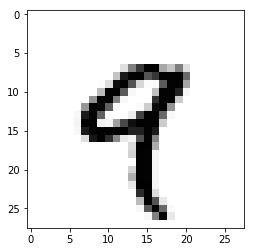

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index=4
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

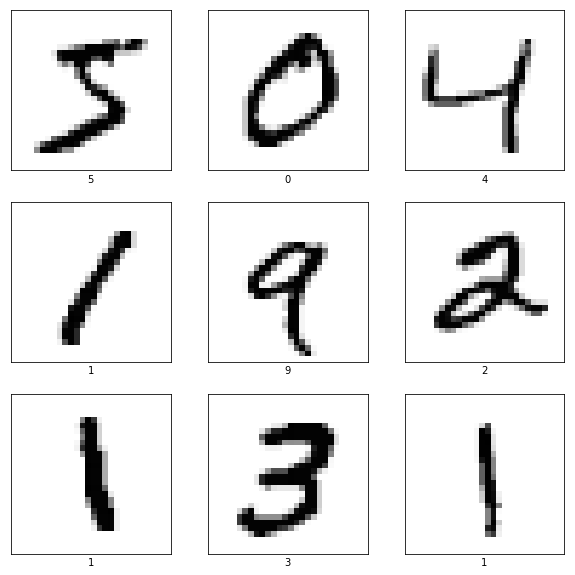

In [52]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='Greys')
    plt.xlabel(y_train[i])
plt.show()

What's actually in each of these x_train data points? Pixels! Pixels range in value from 0 to 255, where 0 represents white and 255 represents black. 

![remote sensing](images.png)

In [53]:
print(x_train[image_index][15][15])

252


We squash these values down to the range [0, 1] by dividing by 255.

In [54]:
x_train, x_test=x_train/255, x_test/255

We are now ready to build our model! To do this, we'll build it in three steps, with only one hidden layer.

In [55]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(15, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

![neural network](goal.png)

Essentially, our model is performing the computation $h=\sigma(W^t \bar{x}+b)$ in the first layer, where $W$ is a $784\times 15$ weight matrix, and $b$ is a $15\times 1$ bias vector. This accounts for a $11760+15=11775$ parameters. In the second layer, we have $o=\text{softmax}(\tilde{W}^t \bar{h}+\tilde{b})$, where $\tilde{W}$ is a $15\times 10$ weight matrix, and $\tilde{b}$ is a $10\times 1$ bias vector. This accounts for $150+10=160$ parameters. We can summarize this below.

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


We're now ready to compile the model! To do this, we need three parameters (taken from [TensorFlow Tutorials](https://www.tensorflow.org/tutorials/keras/basic_classification)):
* Loss function: This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* Optimizer: This is how the model is updated based on the data it sees and its loss function.
* Metrics: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [57]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

Let's breakdown what these mean one step at a time. 

In [58]:
y_test=keras.utils.to_categorical(y_test, num_classes=10)
y_train=keras.utils.to_categorical(y_train, num_classes=10)

In [59]:
model.fit(x_train, y_train, epochs=24, batch_size=128)

Epoch 1/24
60000/60000 [==============================] - 2s 25us/step - loss: 0.0515 - acc: 0.7217
Epoch 2/24
60000/60000 [==============================] - 1s 20us/step - loss: 0.0224 - acc: 0.8882
Epoch 3/24
60000/60000 [==============================] - 1s 21us/step - loss: 0.0166 - acc: 0.9065
Epoch 4/24
60000/60000 [==============================] - 1s 20us/step - loss: 0.0142 - acc: 0.9173
Epoch 5/24
60000/60000 [==============================] - 1s 20us/step - loss: 0.0128 - acc: 0.9244
Epoch 6/24
60000/60000 [==============================] - 1s 20us/step - loss: 0.0118 - acc: 0.9286
Epoch 7/24
60000/60000 [==============================] - 1s 20us/step - loss: 0.0111 - acc: 0.9328
Epoch 8/24
60000/60000 [==============================] - 1s 19us/step - loss: 0.0105 - acc: 0.9358
Epoch 9/24
60000/60000 [==============================] - 1s 19us/step - loss: 0.0100 - acc: 0.9383
Epoch 10/24
60000/60000 [==============================] - 1s 19us/step - loss: 0.0096 - acc: 0.9412

In [60]:
test_loss, test_accuracy=model.evaluate(x_test, y_test)
print('Test Accuracy', test_accuracy)

10000/10000 [==============================] - 0s 36us/step
Test Accuracy 0.9455


In [199]:
predictions=model.predict(x_test)

In [200]:
predictions[0]

array([6.0186209e-04, 1.8622178e-04, 4.8959680e-04, 6.2130196e-03,
       2.9803600e-04, 4.4225037e-04, 7.1547940e-05, 9.7894579e-01,
       7.6698416e-05, 1.2674916e-02], dtype=float32)

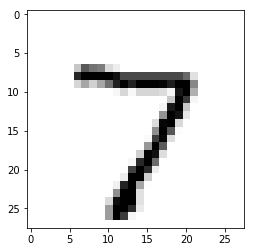

In [201]:
plt.imshow(x_test[0], cmap='Greys')

In [202]:
import numpy as np

In [203]:
np.argmax(predictions[0])

7

In [169]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [173]:
plot_value_array(0, predictions, np.argmax(y_test))

IndexError: invalid index to scalar variable.

In [176]:
np.argmax(y_test)

7